# Measuring climate change 
*[Doing Economics: Empirical Project 1](https://www.core-econ.org/doing-economics/book/text/01-01.html#learning-objectives)*

## Learning objectives

In this project you will:

- use charts and summary measures to discuss the extent of climate change and its possible causes
- use line charts to describe the behaviour of real-world variables over time (Part 1.1)
- summarize data in a frequency table, and visualize distributions with column charts (Part 1.2)
- describe a distribution using mean and variance (Part 1.2)
- use scatterplots and the correlation coefficient to assess the degree of association between two variables (Part 1.3)
- explain what correlation measures and the limitations of correlation (Part 1.3).

> ## Key concepts
> - Concepts needed for this project: mean, median, and decile.
> - Concepts introduced in this project: variance, frequency table, correlation and correlation coefficient, causation, and spurious correlation.


## Introduction

Climate change is one of the effects of the rapid economic growth that has occurred in most countries since the Industrial Revolution. It is an important issue for policymaking, since governments need to assess how serious the problem is and then decide how to mitigate it.

Suppose you are a policy advisor for a small island nation. The government would like to know more about the extent of climate change and its possible causes. They ask you the following questions:

How can we tell whether climate change is actually happening or not?
If it is real, how can we measure the extent of climate change and determine what is causing it?
To answer the first question, we look at the behaviour of environmental variables over time to see whether there are general patterns in environmental conditions that could be indicative of climate change. In this project, we focus on temperature-related variables.

To answer the second question, we examine the degree of association between temperature and another variable, CO2 emissions, and consider whether there is a plausible relationship between the two, or whether there are other explanations for what we observe.


## Part 1.1 The behaviour of average surface temperature over time

> ### Learning objectives for this part
> Use line charts to describe the behaviour of real-world variables over time

In the questions below, we look at data from NASA about land–ocean temperature anomalies in the northern hemisphere. Figure 1.1 is constructed using this data, and shows temperatures in the northern hemisphere over the period 1880–2016, expressed as differences from the average temperature from 1951 to 1980. We start by creating charts similar to Figure 1.1, in order to visualize the data and spot patterns more easily.

![](https://www.core-econ.org/doing-economics/book/images/web/figure-01-01.jpg)

**Figure 1.1** Northern hemisphere temperatures (1880–2016).

### R Walkthrough: Importing the datafile into R

We want to import the datafile called 'NH.Ts+dSST.csv' into R. 

We start by setting our working directory using the `setwd` command. This command tells R where your datafiles are stored. In the code below, replace 'YOURFILEPATH' with the full filepath that indicates the folder in which you have saved the datafile. If you don't know how to find the path to your working folder, see the 'Technical Reference' section (https://tinyco.re/3407438). 



In [4]:
list.files('./')

character(0)

We see there are no files listed in our working directory because we first need to download the data. We will do this directly in R using the `download.file` command to get a copy of the data hosted by CORE.

In [5]:
download.file('https://jiboncom.github.io/doing-economics/files/nasa_data.csv',method = "auto", destfile='./data.csv')

trying URL 'https://jiboncom.github.io/doing-economics/files/nasa_data.csv'


We can use the `list.files` command to confirm the file was downloaded correctly.

In [6]:
list.files('./')

[1] "data.csv"

--- 

Since our data is in csv format, we use the `read.csv` function to import the data into R. We will call our file 'tempdata' (short for 'temperature data').

Here you can see commands to R which are spread across two lines. You can spread a command across multiple lines, but you must adhere to the following two rules for this to work. First, the line break should come inside a set of parenthesis (i.e. between `(` and `)` or straight after the assignment operator (`<-`). Second, the line break must not be inside a string (whatever is inside quotes) or in the middle of a word or number.

In [7]:
tempdata <- read.csv("data.csv", skip = 1, na.strings = "***") 

When using this function, we added two options. If you open the spreadsheet in Excel, you will see that the real data table only starts in Row 2, so we use the `skip = 1` option to skip the first row when importing the data. When looking at the spreadsheet, you can see that missing temperature data is coded as `"***"`. In order for R to recognise the non-missing temperature data as numbers, we use  the `na.strings = "***"` option to indicate that missing observations in the spreadsheet are coded as `"***"`. 

To check that the data has been imported correctly, you can use the `head` function to view the first six rows of the dataset, and confirm that they correspond to the columns in the csv file.

In [8]:
head(tempdata)

  Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1 1880 -0.39 -0.54 -0.24 -0.31 -0.05 -0.18 -0.23 -0.27 -0.26 -0.31 -0.46 -0.43
2 1881 -0.31 -0.26 -0.07 -0.03  0.03 -0.34  0.08 -0.06 -0.29 -0.45 -0.38 -0.24
3 1882  0.25  0.20  0.01 -0.31 -0.24 -0.29 -0.28 -0.17 -0.26 -0.53 -0.34 -0.69
4 1883 -0.58 -0.66 -0.15 -0.30 -0.26 -0.11 -0.06 -0.23 -0.34 -0.16 -0.45 -0.15
5 1884 -0.17 -0.11 -0.64 -0.59 -0.36 -0.41 -0.41 -0.51 -0.45 -0.45 -0.58 -0.47
6 1885 -1.00 -0.46 -0.24 -0.49 -0.58 -0.45 -0.34 -0.41 -0.39 -0.36 -0.38 -0.11
    J.D   D.N   DJF   MAM   JJA   SON
1 -0.31    NA    NA -0.20 -0.23 -0.34
2 -0.19 -0.21 -0.33 -0.02 -0.11 -0.37
3 -0.22 -0.18  0.07 -0.18 -0.25 -0.38
4 -0.29 -0.33 -0.64 -0.24 -0.13 -0.32
5 -0.43 -0.40 -0.14 -0.53 -0.45 -0.49
6 -0.44 -0.47 -0.64 -0.44 -0.40 -0.38

Before working with the important data, we use the `str` function to check that the data is formatted correctly.

In [9]:
str(tempdata)

'data.frame':	145 obs. of  19 variables:
 $ Year: int  1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 ...
 $ Jan : num  -0.39 -0.31 0.25 -0.58 -0.17 -1 -0.74 -1.08 -0.48 -0.27 ...
 $ Feb : num  -0.54 -0.26 0.2 -0.66 -0.11 -0.46 -0.84 -0.7 -0.61 0.29 ...
 $ Mar : num  -0.24 -0.07 0.01 -0.15 -0.64 -0.24 -0.71 -0.44 -0.63 -0.01 ...
 $ Apr : num  -0.31 -0.03 -0.31 -0.3 -0.59 -0.49 -0.36 -0.38 -0.21 0.17 ...
 $ May : num  -0.05 0.03 -0.24 -0.26 -0.36 -0.58 -0.33 -0.25 -0.15 -0.03 ...
 $ Jun : num  -0.18 -0.34 -0.29 -0.11 -0.41 -0.45 -0.37 -0.21 -0.02 -0.07 ...
 $ Jul : num  -0.23 0.08 -0.28 -0.06 -0.41 -0.34 -0.14 -0.24 0 -0.08 ...
 $ Aug : num  -0.27 -0.06 -0.17 -0.23 -0.51 -0.41 -0.42 -0.55 -0.21 -0.2 ...
 $ Sep : num  -0.26 -0.29 -0.26 -0.34 -0.45 -0.39 -0.33 -0.21 -0.19 -0.3 ...
 $ Oct : num  -0.31 -0.45 -0.53 -0.16 -0.45 -0.36 -0.31 -0.49 -0.03 -0.41 ...
 $ Nov : num  -0.46 -0.38 -0.34 -0.45 -0.58 -0.38 -0.4 -0.27 -0.01 -0.61 ...
 $ Dec : num  -0.43 -0.24 -0.69 -0.15 -0.47 -0.11 -0.

You can see that all variables are formatted as numerical data (`num`), so R correctly recognises that the data are numbers. 

**NOTE:** In this dataset, temperature is measured as ‘anomalies’ rather than as absolute temperature. Using NASA’s Frequently Asked Questions section as a reference, explain in your own words what temperature ‘anomalies’ means. Why have researchers chosen this particular measure over other measures (such as absolute temperature)?

### R Walkthrough: Drawing a line chart of temperature and time

The data is formatted as numerical (`num`) data, so R recognises each variable as a series of numbers (instead of text), but does not recognise that these numbers correspond to the same variable for different time periods (known as "time series data" in economics). Letting R know that we have time series data will make coding easier later (especially with making graphs). You can use the `ts` function to specify that a variable is a time series. Make sure to amend the code below so that the end year  (`end = c()`) corresponds to the latest year in your dataset (our example uses 2024).

In [10]:
tempdata$Jan <- ts(tempdata$Jan, start = c(1880), end = c(2024), frequency = 1) 
tempdata$DJF <- ts(tempdata$DJF, start = c(1880), end = c(2024), frequency = 1) 
tempdata$MAM <- ts(tempdata$MAM, start = c(1880), end = c(2024), frequency = 1) 
tempdata$JJA <- ts(tempdata$JJA, start = c(1880), end = c(2024), frequency = 1) 
tempdata$SON <- ts(tempdata$SON, start = c(1880), end = c(2024), frequency = 1) 
tempdata$J.D <- ts(tempdata$J.D, start = c(1880), end = c(2024), frequency = 1) 

Note that we placed each of these quarterly series in the relevant middle month. You could do the same for the remaining series, but we will only use the series above in this R walk-through.

We can now use these variables to draw line charts using the `plot` function. As an example, we will draw a line chart using data for January (`tempdata$Jan`) for the years 1880â€“2016. The `title` option on the next line adds a chart title, and the `abline` option draws a horizontal line according to our specifications. Make sure to amend the code below so that your chart title corresponds to the latest year in your dataset (our example uses 2016).

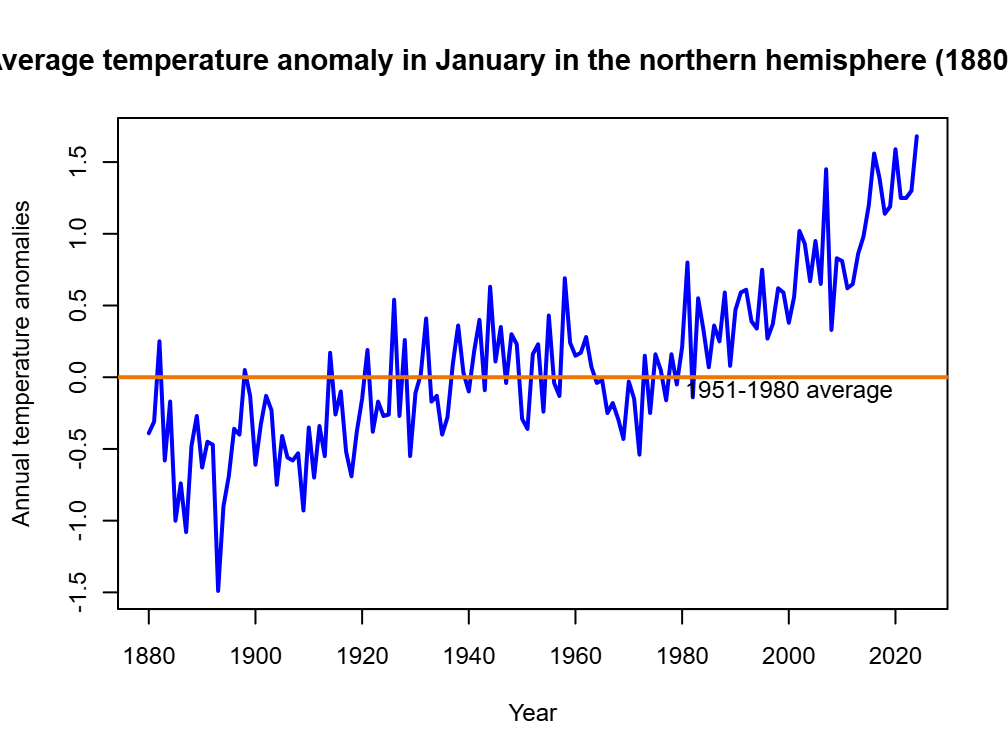

In [11]:
# Set line width and colour
plot(tempdata$Jan, type = "l", col = "blue", lwd = 2,
  ylab = "Annual temperature anomalies", xlab = "Year")

# Add a title
title(" Average temperature anomaly in January in the northern hemisphere (1880-2016)")

# Add a horizontal line (at y = 0)
abline(h = 0, col = "darkorange2", lwd = 2)

# Add a label to the horizontal line
text(2000, -0.1, "1951-1980 average") 

Try different values for `type` and `col` in the `plot` function to figure out what these options do (some online research could help). `xlab` and `ylab` define the respective axis titles. 

It is important to remember that all axis and chart titles should be enclosed in quotation marks (`""`), as well as any words that are not options (for example, colour names or filenames).

##### Extra practice 
The columns labelled DJF, MAM, JJA, and SON contain seasonal averages (means). For example, the MAM column contains the average of the March, April, and May columns for each year. Plot a separate line chart for each season, using average temperature anomaly for that season on the vertical axis and time (from 1880 to the latest year available) on the horizontal axis.
